## Forecasting with ARMA models

This exercise will introduce the concept of forecasting with univariate models. You will estimate very simple models and compare performance with well-documented measures of forecasting accuracy.

In [4]:
import Haver
import pandas as pd 
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
from sklearn.metrics import mean_squared_error
from math import sqrt

In [7]:
Haver.path('C:\\Users\\RNAMG01\\Desktop\\python haver training\\US1PLUS\\')

In [8]:
gdp=Haver.data(['gdph'] ,'us1plus', dates=True)

In [9]:
gdp.head()

,gdph
1947-03-31,2033.1
1947-06-30,2027.6
1947-09-30,2023.5
1947-12-31,2055.1
1948-03-31,2086.0


In [10]:
gdp.tail()

,gdph
2017-09-30,18120.8
2017-12-31,18223.8
2018-03-31,18324.0
2018-06-30,18511.6
2018-09-30,18665.0


Text(0.5,1,'U.S. Real GDP')

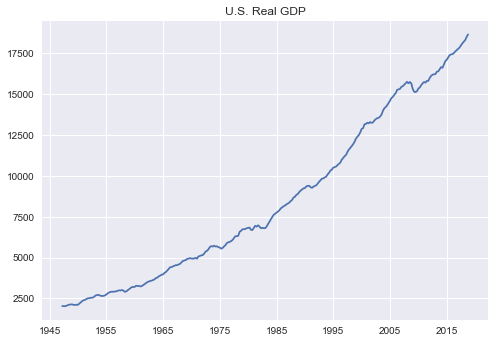

In [11]:
plt.plot(gdp)
plt.title('U.S. Real GDP')

In [13]:
#Creating train and test set 
train=gdp['1947-03-31':'2015-12-31'] 
test=gdp['2016-03-31':]

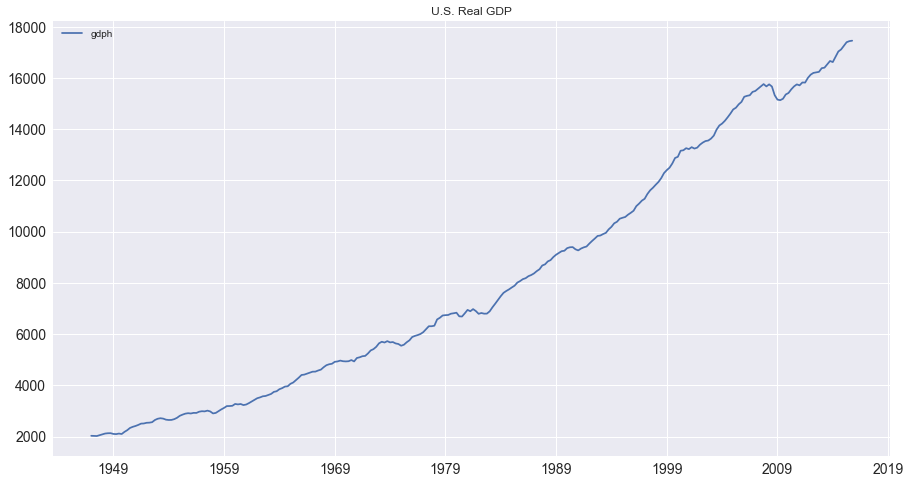

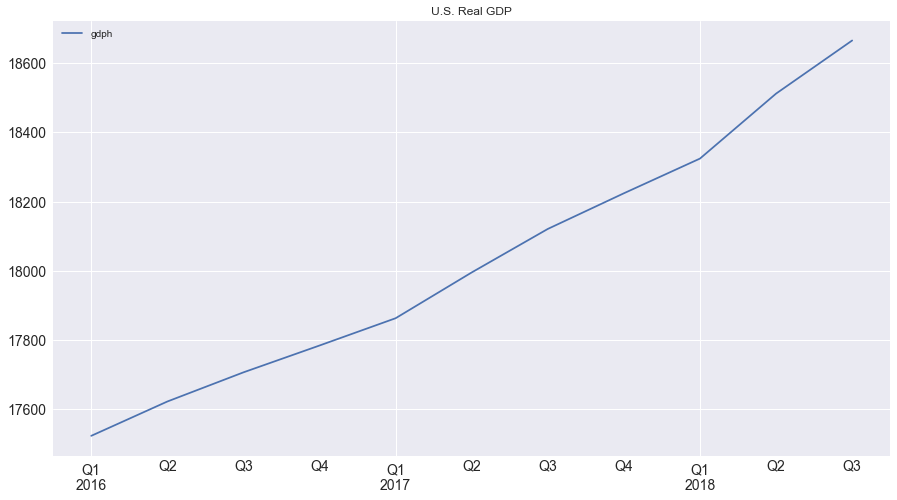

In [14]:
#Plotting data
train.plot(figsize=(15,8), title= 'U.S. Real GDP', fontsize=14)
test.plot(figsize=(15,8), title= 'U.S. Real GDP', fontsize=14)
plt.show()

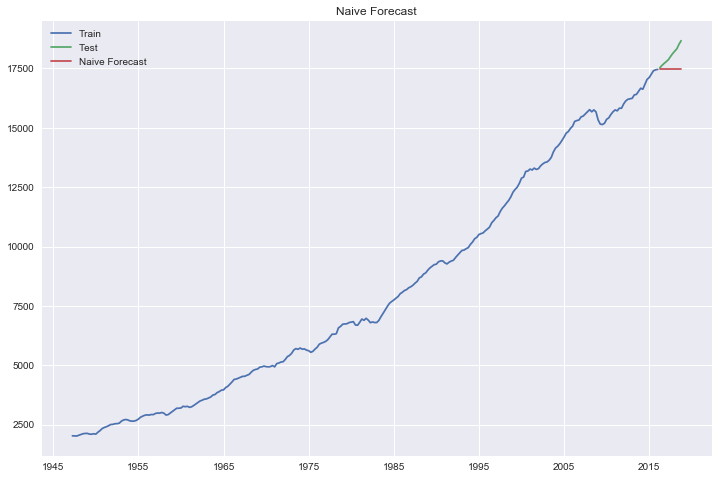

In [15]:
dd=np.asarray(train.gdph)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['gdph'], label='Train')
plt.plot(test.index,test['gdph'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [16]:

rms = sqrt(mean_squared_error(test.gdph, y_hat.naive))
print(rms)



675.3826780560638


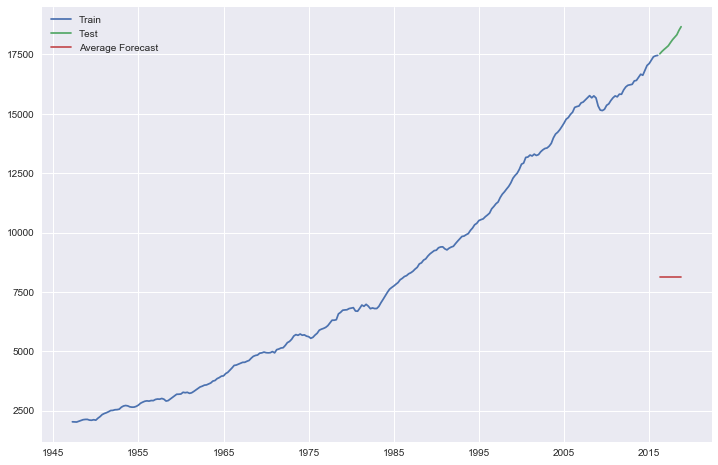

In [17]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['gdph'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['gdph'], label='Train')
plt.plot(test['gdph'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [18]:
rms = sqrt(mean_squared_error(test.gdph, y_hat_avg.avg_forecast))
print(rms)

## want smallest rms (root mean squared error)

9915.783313282147


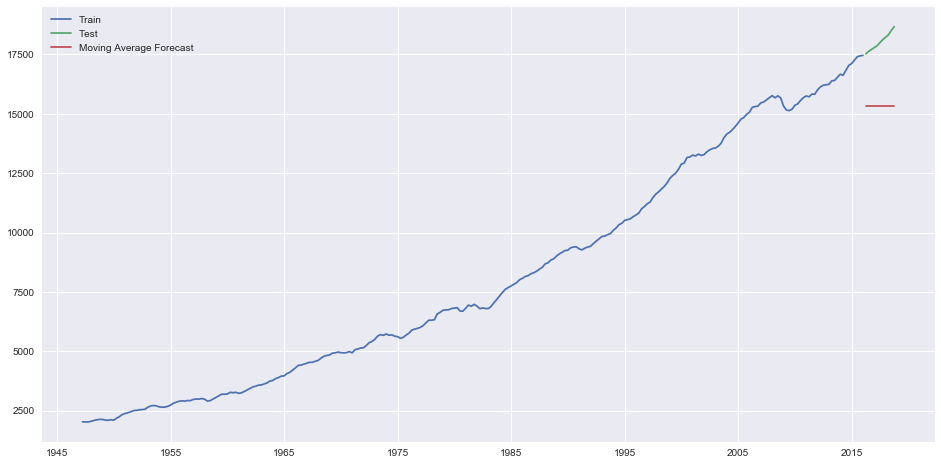

In [19]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['gdph'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['gdph'], label='Train')
plt.plot(test['gdph'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [20]:
rms = sqrt(mean_squared_error(test.gdph, y_hat_avg.moving_avg_forecast))
print(rms)

2710.9502595865315
